# 1. Gradient Descent with Python and NumPy

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Extract and filter Data

In [ ]:
# extract Bitcoin and Ethereum price data for one year using Alpha Vantage API
from alpha_vantage.cryptocurrencies import CryptoCurrencies
from alpha_vantage.foreignexchange import ForeignExchange
from datetime import datetime, timedelta

# API key
api_key = '..'

# initialise API objects
cc = CryptoCurrencies(key=api_key, output_format='pandas')
fx = ForeignExchange(key=api_key, output_format='pandas')

# get btc and gold data 
btc_data, _ = cc.get_digital_currency_daily(symbol='BTC', market='USD')
eth_data, _ = cc.get_digital_currency_daily(symbol='ETH', market='USD')

# time formating
three_years = datetime.now() - timedelta(days=3*365)
btc_data.index = pd.to_datetime(btc_data.index)
eth_data.index = pd.to_datetime(eth_data.index)
btc_filt = btc_data[btc_data.index >= three_years]
eth_filt = eth_data[eth_data.index >= three_years]

# extract close price and date
btc_close_only = btc_filt[['4. close']]
eth_close_only = eth_filt[['4. close']]

# save data 
btc_close_only.to_csv('btc_data.csv')
eth_close_only.to_csv('eth_data.csv')


In [ ]:
# convert to numpy
btc_numpy = btc_close_only.to_numpy()
eth_numpy = eth_close_only.to_numpy()

def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

btc_standard = normalize(btc_numpy)
eth_standard = normalize(eth_numpy)

### Regression function
$$
ETH_t = \alpha + \beta BTC_t + e_t
$$


In [ ]:
# OLS alpha and beta
beta = ((np.multiply(eth_standard, btc_standard)).mean()-np.mean(btc_standard)*np.mean(eth_standard))/((np.multiply(btc_standard, eth_standard)).mean()-np.mean(btc_standard)*np.mean(btc_standard))
alpha = np.mean(eth_standard)-beta*np.mean(btc_standard)
print("alpha =",alpha, "\nbeta =",beta) 

alpha = 0.462463241258801 
beta = 0.20720623503046676


## Gradient Descent

In [ ]:

def  cal_cost(beta0,beta1,x,y):
        n = len(y)
        predictions = beta0 + np.multiply(beta1,x)
        cost = (1/2*n) * np.sum(np.square(predictions-y))
        return cost

# gradient descent alpha and beta
iterations = 500
learn_rate = 0.4
beta0 = alpha
beta1 = beta
n = len(btc_standard)
index = np.arange(1, iterations+1, 1).reshape((iterations, 1))

loss_history = np.zeros((iterations,1))
beta0_history = np.zeros((iterations,1))
beta1_history = np.zeros((iterations, 1))

for i in range(iterations):
       
        prediction = beta0 + np.multiply(beta1,btc_standard)
        residuals = eth_standard-prediction
        residuals_sum = sum(residuals)
        beta0_gradient = -(1/n)*residuals_sum*(learn_rate)
        beta0 = beta0 - beta0_gradient
        beta0_history[i] = beta0
    
        residuals_x = np.multiply(residuals,btc_standard)
        residuals_x_sum = sum(residuals_x)
        beta1_gradient = -(1/n)*residuals_x_sum*(learn_rate)
        beta1 = beta1 - beta1_gradient
        beta1_history[i] = beta1
        loss_history[i] = cal_cost(beta0,beta1,btc_standard,eth_standard)
### (Univeristy of Exeter, n.d.)

## Plot Data

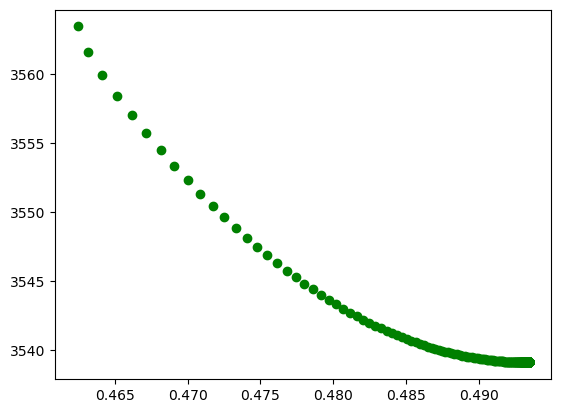

In [ ]:
# plot the optimal alpha history
plt.plot(beta0_history,loss_history,'go')

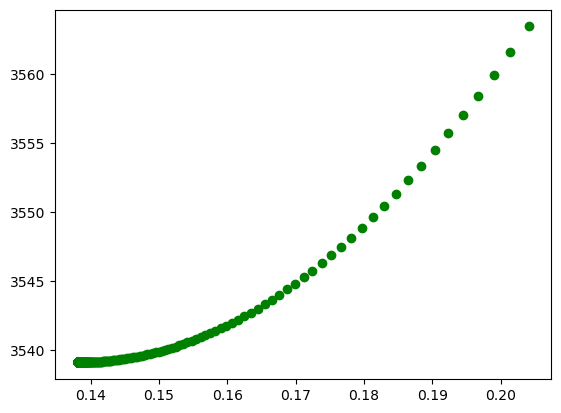

In [ ]:
# plot the optimal beta history
plt.plot(beta1_history,loss_history,'go')

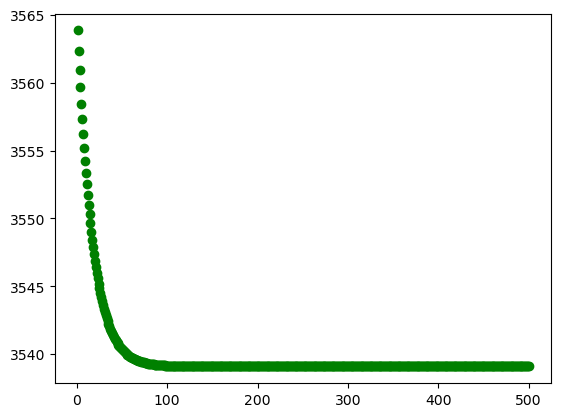

In [ ]:
# plot the loss history
plt.plot(index,loss_history,'go')

In [ ]:
# print the result of the analysis
def flat (x):
    return x.flatten()

print(f"The optimal alpha is {str(np.round(max(flat(beta0_history)), 5))} and the optimal beta is {str(np.round(min(flat(beta1_history)), 5))}, with the minimum loss of {str(np.round(min(flat(loss_history)), 5))}.")

The optimal alpha is 0.49341 and the optimal beta is 0.13814, with the minimum loss of 3539.09448.


In practice the underlying data might have very big numbers, such as Bitcoin. When calculating the losses the numpy arrays may not support the very large error values after they have been squared. This may also cause the slope for beta in the Gradient Descent function to be extremely large, which may fail to return reliable data. To solve the issue the data sets should be normalised or scaled using standard scaler.